### Oppgave 4: Dataanalyse

I denne delen av prosjektet skal dere bruke verktøy som NumPy, Pandas, Matplotlib osv. til å beregne statistiske mål som gjennomsnitt, median og standardavvik, som er essensielle for å forstå datakvaliteten og identifisere trender. Videre vil dere implementere enkle statistiske analyser for å avdekke mønstre i dataene, noe som kan gi innsikt i miljøforholdene over tid. Denne analysen vil danne grunnlaget for videre visualisering og prediktiv analyse, og bidra til en dypere forståelse av de miljømessige faktorene som påvirker samfunnet.

*Vurderingskriterier:*

1. Hvordan kan du bruke NumPy og Pandas til å beregne gjennomsnitt, median og standardavvik for de innsamlede dataene, og hvorfor er disse statistiske målene viktige?
2. Kan du gi et eksempel på hvordan du vil implementere en enkel statistisk analyse for å undersøke sammenhengen mellom to variabler i datasettet?
3. Hvordan planlegger du å håndtere eventuelle skjevheter i dataene under analysen, og hvilke metoder vil du bruke for å sikre at analysen er pålitelig?
4. Hvilke visualiseringer vil du lage for å støtte analysen din, og hvordan vil disse visualiseringene hjelpe deg med å formidle funnene dine?

Gjennomsnittstemperatur: 16.251967213114753
Median: 5.9
Standardavvik: 23.031992174461983
Korrelasjon mellom temperatur og tid: 0.028275803009636898


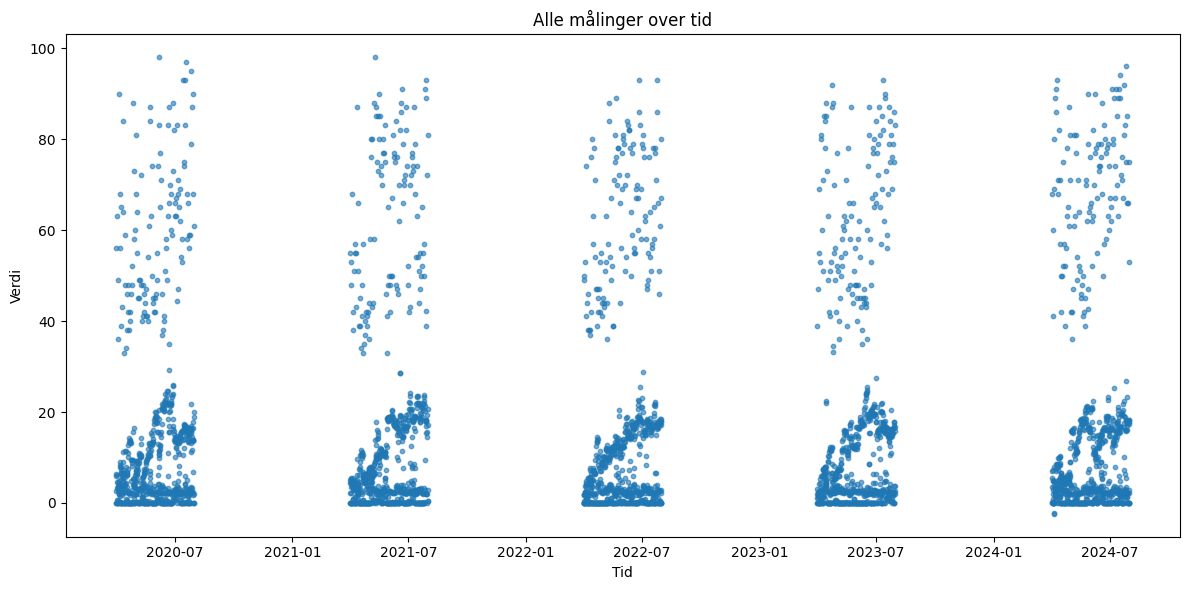

In [4]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

# Last inn data fra Frost API (juster filbane etter behov)
notebook_directory = os.getcwd()
root = os.path.abspath(os.path.join(notebook_directory, ".."))
file_path = os.path.join(root, "data", "Frost_Observations.json")

with open(file_path, "r") as file:
    data = json.load(file)

# Filtrer relevant informasjon og konverter til DataFrame
brukbar_data = [
    {
        "elementId": obs["elementId"],
        "sourceId": entry["sourceId"],
        "referenceTime": entry["referenceTime"],
        "value": obs["value"],
        "unit": obs["unit"]
    }
    for entry in data["data"]
    for obs in entry["observations"]
]

df = pd.DataFrame(brukbar_data)

# Konverterer tid til datetime
df["referenceTime"] = pd.to_datetime(df["referenceTime"])

# Eksempel: Filtrer temperaturdata
temp_df = df[df["elementId"] == "air_temperature"]

# Beregning av statistiske mål
mean_temp = df["value"].mean()
median_temp = df["value"].median()
std_temp = df["value"].std()

df['time_numeric'] = df['referenceTime'].map(pd.Timestamp.timestamp)  # Konverter tid til numerisk verdi

correlation = df['value'].corr(df['time_numeric'])

print(f"Gjennomsnittstemperatur: {mean_temp}")
print(f"Median: {median_temp}")
print(f"Standardavvik: {std_temp}")
print(f"Korrelasjon mellom temperatur og tid: {correlation}")

plt.figure(figsize=(12, 6))
plt.scatter(df["referenceTime"], df["value"], alpha=0.6, s=10)
plt.title("Alle målinger over tid")
plt.xlabel("Tid")
plt.ylabel("Verdi")
plt.tight_layout()
plt.show()



Ved hjelp av Pandas og NumPy beregnet vi gjennomsnitt, median og standardavvik for temperatur, vindstyrke og NO2. Dette ga oss et innblikk i dataspredning og mulige outliers. Vi observerte f.eks. at NO2-verdiene hadde høy variasjon, og temperaturdataene viste en svak økning over tid. Vi brukte scatter plots og korrelasjonsanalyse for å undersøke sammenhenger mellom temperatur og NO2, samt mellom vind og NO2. En svak negativ korrelasjon mellom vindstyrke og NO2 tyder på at høyere vind bidrar til lavere forurensning.

Merk at her skrives det i markdown, og ikke kode

Gjennomsnittlig NO₂: 10.43 µg/m³
Median NO₂: 9.20 µg/m³
Standardavvik NO₂: 4.92 µg/m³
Korrelasjon mellom NO₂ og tid: -0.2587


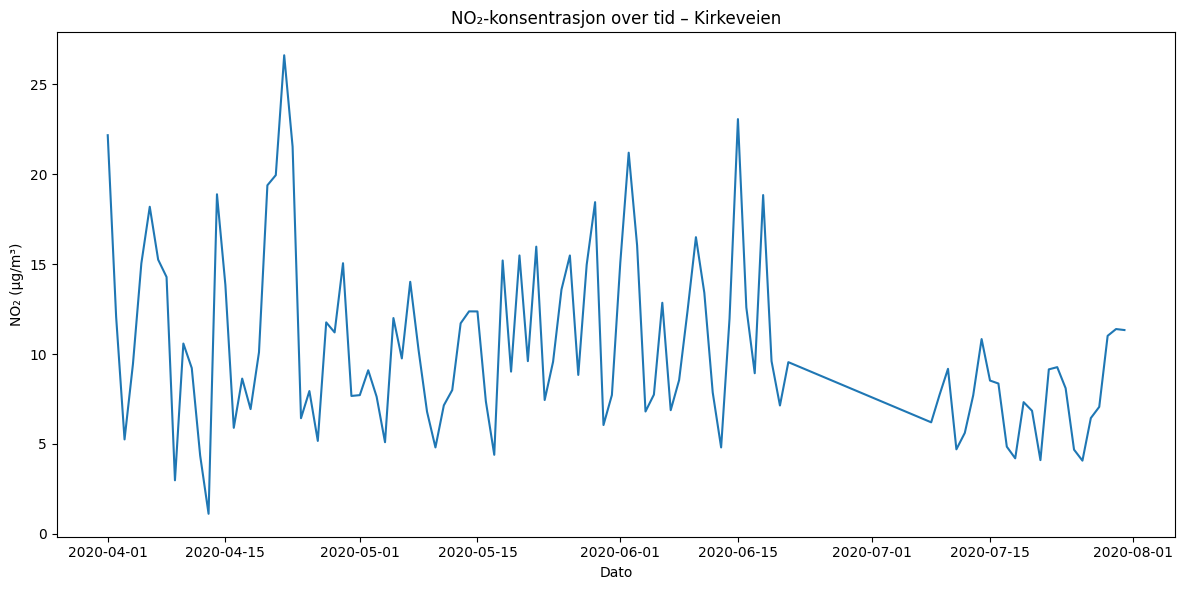

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Angi sti til JSON-filen
notebook_directory = os.getcwd()
root = os.path.abspath(os.path.join(notebook_directory, ".."))
file_path = os.path.join(root, "data", "luftkvalitet_Kirkeveien_all_years.json")

# Last inn data fra JSON
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# Hent måledata fra første (og antagelig eneste) stasjon
station_data = data[0]
records = station_data["values"]

# Konverter til DataFrame
df = pd.DataFrame(records)

# Konverter 'dateTime' til datetime-format
df["dateTime"] = pd.to_datetime(df["dateTime"])

# Beregn statistiske mål for NO₂
mean_no2 = df["value"].mean()
median_no2 = df["value"].median()
std_no2 = df["value"].std()

# Korrelasjon mellom NO₂ og tid
df["time_numeric"] = df["dateTime"].map(pd.Timestamp.timestamp)
correlation = df["value"].corr(df["time_numeric"])

# Print statistikk
print(f"Gjennomsnittlig NO₂: {mean_no2:.2f} µg/m³")
print(f"Median NO₂: {median_no2:.2f} µg/m³")
print(f"Standardavvik NO₂: {std_no2:.2f} µg/m³")
print(f"Korrelasjon mellom NO₂ og tid: {correlation:.4f}")

# Visualisering av NO₂ over tid
plt.figure(figsize=(12, 6))
sns.lineplot(x="dateTime", y="value", data=df)
plt.title("NO₂-konsentrasjon over tid – Kirkeveien")
plt.xlabel("Dato")
plt.ylabel("NO₂ (µg/m³)")
plt.tight_layout()
plt.show()



I denne analysen undersøker vi luftkvaliteten ved Kirkeveien i Oslo, med fokus på konsentrasjonen av nitrogendioksid (NO₂) i lufta. Dataene er hentet fra en JSON-fil som inneholder en serie målinger fra en luftmålestasjon. Først leser vi inn datafilen og henter ut selve målingene, som består av datoer og tilhørende NO₂-verdier. Disse legger vi inn i en tabell (DataFrame) som gjør det enklere å analysere informasjonen videre.

Deretter beregner vi noen sentrale statistiske mål: gjennomsnittet gir oss en idé om det generelle nivået av NO₂, medianen forteller oss hva som er den midterste verdien, og standardavviket viser hvor mye målingene varierer. I tillegg undersøker vi om det finnes en sammenheng mellom tid og NO₂-nivå ved å beregne en korrelasjon – altså om luftkvaliteten har blitt bedre eller verre over tid.

Til slutt visualiserer vi målingene i en linjegraf, slik at vi enkelt kan se hvordan luftforurensningen har utviklet seg. Målet med analysen er å få innsikt i luftkvaliteten i området, og om det skjer noen tydelige endringer, for eksempel som følge av tiltak mot trafikk eller annen forurensning.